In [7]:
import sys
sys.path.append('..')

In [15]:
from modular import data_setup, engine, models, utils, helper
import torch
from pathlib import Path

In [9]:
# Model setup
model, transforms = models.create_vit_model(5, 42)

In [ ]:
# Data setup

train_dir = '../data/train'
test_dir = '../data/test'

train_dataloader, test_dataloader, class_names, targets = data_setup.create_dataloaders(train_dir, test_dir, transforms)

In [11]:
# Setup loss function and optimizer
LR = 0.001
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

In [12]:
EPOCHS = 3
results = engine.train(model, train_dataloader, test_dataloader, optimizer=optimizer, loss_fn=loss_fn, epochs=EPOCHS, device='cpu')

 33%|███▎      | 1/3 [01:31<03:02, 91.47s/it]

Epoch: 1 | train_loss: 1.1880 | train_acc: 0.6403 | test_loss: 0.7485 | test_acc: 0.9158


 67%|██████▋   | 2/3 [02:55<01:26, 86.94s/it]

Epoch: 2 | train_loss: 0.5325 | train_acc: 0.9173 | test_loss: 0.3795 | test_acc: 0.9688


100%|██████████| 3/3 [04:20<00:00, 86.89s/it]

Epoch: 3 | train_loss: 0.2867 | train_acc: 0.9530 | test_loss: 0.2289 | test_acc: 0.9688


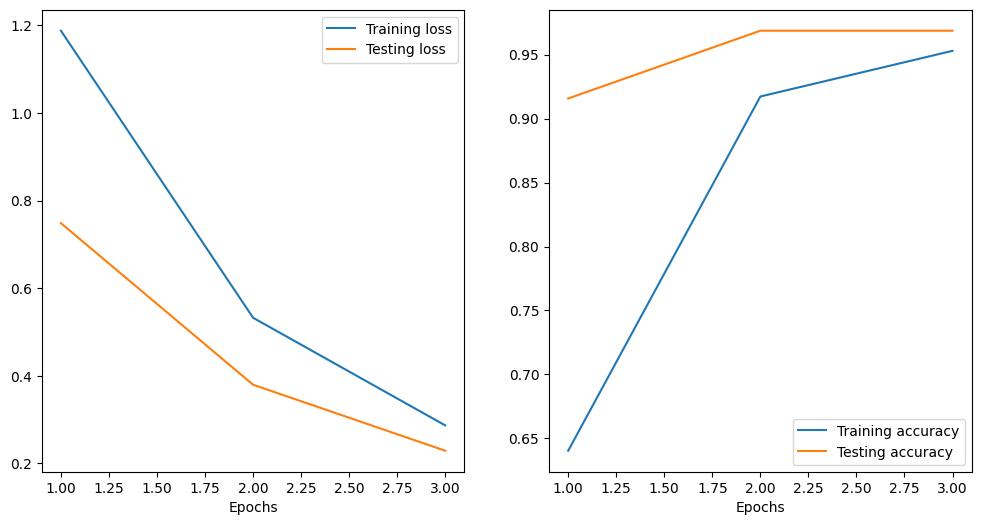

In [13]:
helper.plot_results(results, EPOCHS)

Making predictions: 100%|██████████| 2/2 [00:28<00:00, 14.16s/it]


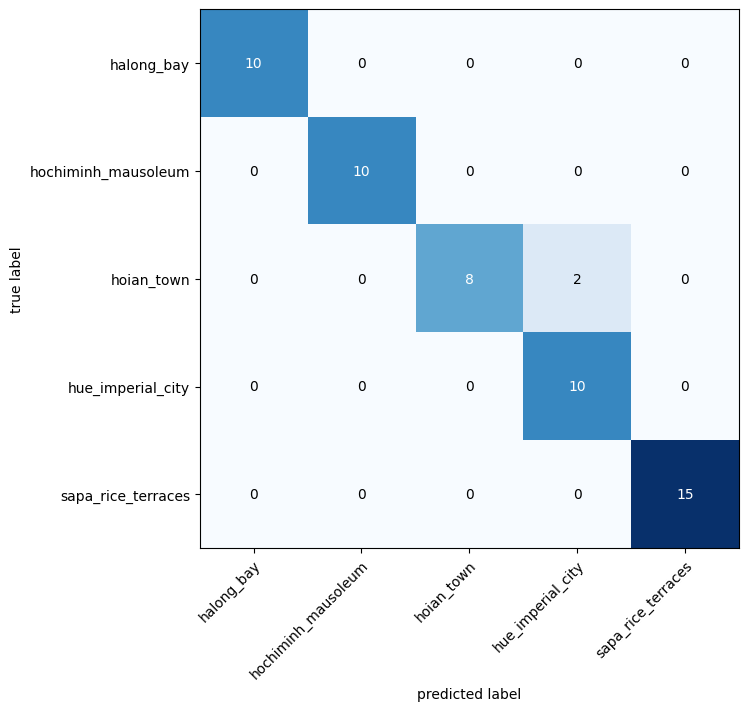

In [14]:
fig, ax = helper.predict_and_plot_confusion_matrix(test_dataloader, model, class_names, targets)

In [ ]:
test_data_paths = list(Path(test_dir).glob("*/*.jpg"))
df = helper.predict_and_store(test_data_paths, model, transforms, class_names)
df